# Runge Kutta Methods to Solve ODEs

Runge-Kutta (RK) is very widely used to solve ODE problems. It's really an extension of Euler, Heun, and midpoint methods... by choosing different and additional intermediate points between $x_i$ and $x_{i+1}$ the truncation error can be reduced even further.

In all cases we will basically be trying to improve the $Slope$ referred to in the last module:

$y_{i+1} = y_i + Slope \cdot h$

## Second Order RK Methods

$y_{i+1} = y_i + (c_1 K_1 + c_2 K_2)h$, where

$K_1 = f(x_i,y_i)$ and $K_2 = f(x_i+a_2h,y_i+b_{21}K_1h)$

The constants $c_1$, $c_2$, $a_2$, and $b_{21}$ are specifed by the particular 2nd order RK method.

For example, if $c_1 = \frac{1}{2},~c_2 = \frac{1}{2},~a_2=1,~b_{21}=1$ we have:

$K_1 = f(x_i,y_i)$ and $K_2 = f(x_i+h,y_i+f(x_i,y_i)h)$... $K_2$ looks familiar.  if we notice that $K_2=f(x_{i+1},y_{i+1}^{Euler})$.


$\large y_{i+1}^{RK2} = y_i + \frac{f(x_i,y_i) + f(x_{i+1},y_{i+1}^{Euler})}{2} h$

So...this set of constants results in a RK2 technique that is equivalent to *Heun's method*.

We can also get the *Mid-point method* by letting $c_1 = 0,~c_2 = 1,~a_2=\frac{1}{2},~b_{21}=\frac{1}{2}$

Another popular choice for RK2 is: $c_1 = \frac{1}{4},~c_2 = \frac{3}{4},~a_2=\frac{2}{3},~b_{21}=\frac{2}{3}$:

$y_{i+1} = y_i + (\frac{1}{4} K_1 + \frac{3}{4} K_2)h$, where

$K_1 = f(x_i,y_i)$ and $K_2 = f(x_i+\frac{2}{3}h,y_i+\frac{2}{3}K_1h)$


## Derivation of RK2 and RK2 Error

It starts with writing a Taylor series expansion from $x_i$ to $x_{i+1}$ to determine $y_{i+1}$:

$\large y_{i+1} = y_i + \frac{dy}{dx} \rvert_{x_i} h + \frac{1}{2} \frac{d^2y}{dx^2} \rvert_{x_i} h^2 + O(h^3) $

Note that $\frac{dy}{dx} \rvert_{x_i} = f(x_i,y_i)$ specified by the original differential equation. Thinking back to Calc. and Diff. Eqn. you might remember something called the *total differential*:

$\large dg = \frac{\partial g}{\partial x} dx + \frac{\partial g}{\partial y}dy$

If this whole expression is divided by $dx$:

$\large \frac{dg}{dx} = \frac{\partial g}{\partial x}  + \frac{\partial g}{\partial y} \frac{dy}{dx}$

In the current context we can use this to find $\frac{d^2y}{dx^2} \rvert_{x_i}$. 


$\large \frac{d^2y}{dx^2} \rvert_{x_i} = (\frac{d}{dx} \frac{dy}{dx})\rvert_{x_i} = \frac{d}{dx} (f(x,y))\rvert_{x_i,y_i}$ 
$\large = \frac{\partial f(x,y)}{\partial x}\rvert_{x_i,y_i}  + \frac{\partial f(x,y)}{\partial y}\rvert_{x_i,y_i} \frac{dy}{dx}\rvert_{x_i,y_i}$

Now we can write out the Taylor series expansion in terms of $f(x_i,y_i)$:

$\large y_{i+1} = y_i + f(x_i,y_i)h + \frac{1}{2}\frac{\partial f(x,y)}{\partial x}\rvert_{x_i,y_i} h^2 + \frac{1}{2}\frac{\partial f(x,y)}{\partial y}\rvert_{x_i,y_i} \frac{dy}{dx}\rvert_{x_i,y_i} h^2 + O(h^3) $

There is a form of Taylor series for a function of two variables (e.g. g(x,y)):

$\large g(x_i+p_xh,y_i+p_yh) = g(x_i,y_i) + \frac{\partial g}{\partial x}\rvert_{x_i,y_i} p_xh + \frac{\partial g}{\partial y}\rvert_{x_i,y_i} p_yh + O(h^2)$

Note that you can write $K_2$ using the two-variable Taylor series above, with $p_x = a_2$ and $p_y = b_{21}K_1$:

$\large K_2 = f(x_i,y_i) + \frac{\partial f}{\partial x}\rvert_{x_i,y_i} a_2 h + \frac{\partial f}{\partial y}\rvert_{x_i,y_i} b_{21} K_1 h + O(h^2)$

Now substitute $K_2$ on the LHS and $K_1 = f(x_i,y_i)$ into:

$\large y_{i+1} = y_i + (c_1 K_1 + c_2 K_2)h$

$\large y_{i+1} =  y_i + c_1 f(x_i,y_i) h + c_2 f(x_i,y_i) h + c_2 a_2 \frac{\partial f}{\partial x}\rvert_{x_i,y_i} h^2 + c_2 b_{21} \frac{\partial f}{\partial y}\rvert_{x_i,y_i} f(x_i,y_i) h^2 + O(h^3) $ 

Comparing this with 

$\large y_{i+1} = y_i + f(x_i,y_i)h + \frac{1}{2}\frac{\partial f(x,y)}{\partial x}\rvert_{x_i,y_i} h^2 + \frac{1}{2}\frac{\partial f(x,y)}{\partial y}\rvert_{x_i,y_i} f(x_i,y_i) h^2 + O(h^3) $


You can see that:

$c_1 + c_2 = 1$, $c_2 a_2 = \frac{1}{2}$ and $c_2 b_{21} = \frac{1}{2}$.

Which are three equations with four unknowns... so we can choose different values of one constant and we will get entirely new sets of constants that forms another RK2 method...

Also note that the local truncation error for calculating $y_{i+1}$ is $O(h^3)$, which when summed up over all intervals will result in a global error of $O(h^2)$.





## Coding of RK2

Now we will implement RK2 in code. We can leave the constants as parameters that can change.

For visualization we will use the same example as we have discussed previously:

$\frac{dy}{dx}=\frac{x^2}{y}$ from $x=0$ to $x=2.1$ with $y(0)=2$. Note the exact solution is

$y=\sqrt{\frac{2 x^3}{3}+4}$


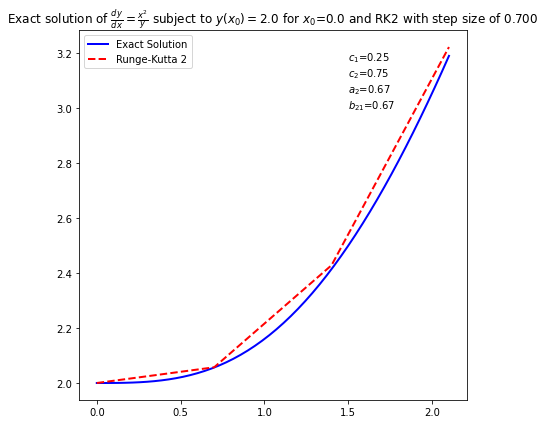

In [11]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

def rk2(xi, yi, c1, c2, a2, b21,h):
    K1 = fxy(xi,yi)
    K2 = fxy(xi+a2*h,yi+b21*K1*h)
    yip1 = yi+(c1*K1+c2*K2)*h
    return yip1

c1 = 0.25
c2 = 0.75
a2 = 2./3
b21 = 2./3

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 4     #number of x values
h = (b-a)/(n-1)   #step size
x_rk2 = np.zeros(n)
y_rk2 = np.zeros(n)
iv = 2.0
y_rk2[0] = iv      #initial condition
x_rk2[0] = a

for i in range(1,n):
    x_rk2[i] = a + i*h
    y_rk2[i] = rk2(x_rk2[i-1],y_rk2[i-1],c1,c2,a2,b21,h)
    

iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_rk2,y_rk2,label="Runge-Kutta 2",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and RK2 with step size of {h:.3f}")
plt.text(1.5,3., f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$a_2$={a2:.2f}\n$b_{{21}}$={b21:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

## Runge Kutta Third Order - RK3

Now we will introduce RK3. Suffice it to say we could go through the math to show how to get RK3 - starting with a Taylor series expansion that includes more terms than the RK2 expansion we did... but, instead we will skip right to the results:

$y_{i+1} = y_i + (c_1 K_1 + c_2 K_2 + c_3 K_3)h$, where

$K_1 = f(x_i,y_i)$ and $K_2 = f(x_i+a_2h,y_i+b_{21}K_1h)$ and $K_3 = f(x_i+a_3h,y_i+b_{31}K_1h+b_{32}K_2h)$

If we had done the Taylor series we would find out that there there would be six equations to solve for the eight constants... so as before, many possible combos of constants.

Compared to the RK2, which has local truncation error of $O(h^3)$ and global error $O(h^2)$, RK3 has local error of $O(h^4)$ and global error of $O(h^3)$.

Given the many choices for the constants in RK3, we present a table with some of the most commonly used values:

| Method    | $c_1$ | $c_2$ | $c_3$ | $a_2$ | $b_{21}$ | $a_3$ | $b_{31}$ | $b_{32}$ |
|:---------:|:-----:|:-----:|:-----:|:-----:|:--------:|:-----:|:--------:|:--------:|
| Classical |$\frac{1}{6}$|$\frac{4}{6}$|$\frac{1}{6}$|$\frac{1}{2}$|$\frac{1}{2}$|1|-1|2|
| Nystrom |$\frac{2}{8}$|$\frac{3}{8}$|$\frac{3}{8}$|$\frac{2}{3}$|$\frac{2}{3}$|$\frac{2}{3}$|0|$\frac{2}{3}$|
| Nearly Optimal|$\frac{2}{9}$|$\frac{3}{9}$|$\frac{4}{9}$|$\frac{1}{2}$|$\frac{1}{2}$|$\frac{3}{4}$|0|$\frac{3}{4}$|
| Heun's Third|$\frac{1}{4}$|0|$\frac{3}{4}$|$\frac{1}{3}$|$\frac{1}{3}$|$\frac{2}{3}$|0|$\frac{2}{3}$|


## Runge Kutta Fourth Order - RK4

Now we will introduce RK4. RK4 is one of the most common ways to solve ODEs

$y_{i+1} = y_i + (c_1 K_1 + c_2 K_2 + c_3 K_3 + c_4 K_4)h$, where

$K_1 = f(x_i,y_i)$
$K_2 = f(x_i+a_2h,y_i+b_{21}K_1h)$
$K_3 = f(x_i+a_3h,y_i+b_{31}K_1h+b_{32}K_2h)$
$K_4 = f(x_i+a_4h,y_i+b_{41}K_1h+b_{42}K_2h+b_{43}K_3h)$

The process of finding a set of equations that relate the constants is very long and we will skip it here.

RK4 has local error of $O(h^5)$ and global error of $O(h^4)$.

Given the many choices for the constants in RK4, we present a table with some of the most commonly used values:

| Method    | $c_1$ | $c_2$ | $c_3$ | $c_4$ | $a_2$ | $a_3$ | $a_4$ | $b_{21}$ | $b_{31}$ | $b_{32}$ | $b_{41}$ | $b_{42}$ | $b_{43}$ |
|:---------:|:-----:|:-----:|:-----:|:-----:|:--------:|:-----:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| Classical |$\frac{1}{6}$|$\frac{2}{6}$|$\frac{2}{6}$|$\frac{1}{6}$|$\frac{1}{2}$|$\frac{1}{2}$|1|$\frac{1}{2}$|0|$\frac{1}{2}$|0|0|1|

Now we will do the same example with RK4 using the classical constants:

$\frac{dy}{dx}=\frac{x^2}{y}$ from $x=0$ to $x=2.1$ with $y(0)=2$. Note the exact solution is

$y=\sqrt{\frac{2 x^3}{3}+4}$

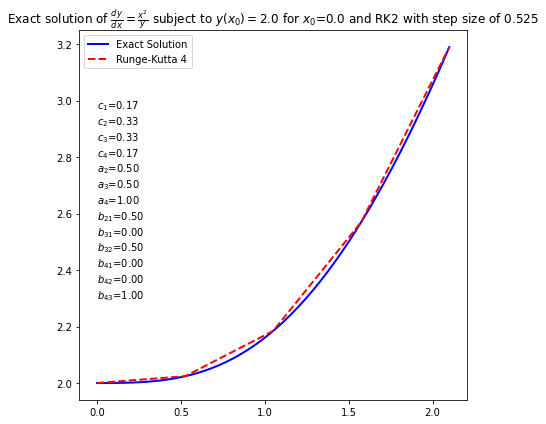

In [6]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fxy = lambda x,y: pow(x,2)/y
fxy_lhs = "dy/dx"
fxy_rhs = "x^2/y"
#fn_string = "ln(x) - 0.6931"
fxy_lhs_syms = sympy.latex(sympy.sympify(fxy_lhs))
fxy_rhs_syms = sympy.latex(sympy.sympify(fxy_rhs))

def rk4(xi, yi, c1, c2, c3, c4, a2, a3, a4,b21, b31, b32, b41, b42, b43,h):
    K1 = fxy(xi,yi)
    K2 = fxy(xi+a2*h,yi+b21*K1*h)
    K3 = fxy(xi+a3*h,yi+b31*K1*h+b32*K2*h)
    K4 = fxy(xi+a4*h,yi+b41*K1*h+b42*K2*h+b43*K3*h)   
    yip1 = yi+(c1*K1+c2*K2+c3*K3+c4*K4)*h
    return yip1

c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

a = 0.0    #initial value for x
b = 2.1    #final value for x
x_TS = np.linspace(a,b)
y_TS = [sqrt(2*pow(num,3)/3+4) for num in x_TS] 

n = 5     #number of x values
h = (b-a)/(n-1)   #step size
x_rk4 = np.zeros(n)
y_rk4 = np.zeros(n)
iv = 2.0
y_rk4[0] = iv      #initial condition
x_rk4[0] = a

for i in range(1,n):
    x_rk4[i] = a + i*h
    y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    

iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_rk4,y_rk4,label="Runge-Kutta 4",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and RK2 with step size of {h:.3f}")
plt.text(0,2.3, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.legend()
plt.tight_layout()
plt.show()